Introduction
===

In [ ]:
'''
=================================================
Optimizing Direct Marketing Campaigns for Bank Term Deposit Subscriptions
Owner: Sam

This program will prepare and process direct marketing campaigns (phone calls) data of a Portuguese banking institution from www.archive.ics.uci.edu.
The purpose of this program is to find out a way to increase term deposit subscription.
=================================================
'''

Problem Statement and Dataset Description
===

## <b>Topic of the Problem</b>

How can we optimizing Direct Marketing Campaigns for Bank Term Deposit Subscriptions




## <b>Background</b>

A Portuguese bank uses direct marketing campaigns to promote financial products such as term deposits, which are crucial for securing stable funding. However, cold calling and broad-based outreach often lead to low conversion rates, wasting resources and missing potential customers. By analyzing past campaign data—including customer demographics, economic indicators, and call details—the bank can develop a predictive model to prioritize clients more likely to subscribe, thereby improving efficiency and profitability.

## <b>SMART Framework</b>

S: Increase term deposit subscription

M: Increase subs rate 3% within one month

A: Targeting high-propensity customers

R: if we achieved this, we would increase deposit volume.

T: one month

## <b>Problem Statement</b>

The Portuguese banking institution aims to improve the effectiveness of its direct marketing campaigns by increasing the subscription rate for term deposits. Currently, the campaigns rely on phone calls, but the conversion rate is suboptimal. The goal is to leverage historical marketing data to identify high-propensity customers and refine targeting strategies to increase the subscription rate by 3% within one month.

## <b>5W+1H</b>

1. What is the approximate median age for individuals who have subscribed, and how does it compare to those who have not subscribed?

2. Which job type has the highest absolute number of non-subscribers?

3. What does it suggest about the relationship between balance and subscription status?

4. Which marital status group has the highest proportional subscription rate, and which has the lowest proportional subscription rate?

5. What is the average age of the clients in the dataset?

6. Is there a statistically significant difference in the average balance between clients who subscribed to a term deposit and those who did not?


## <b> Dataset Source</b>

https://archive.ics.uci.edu/dataset/222/bank+marketing

## Description of the dataset and the origin of the dataset you are using

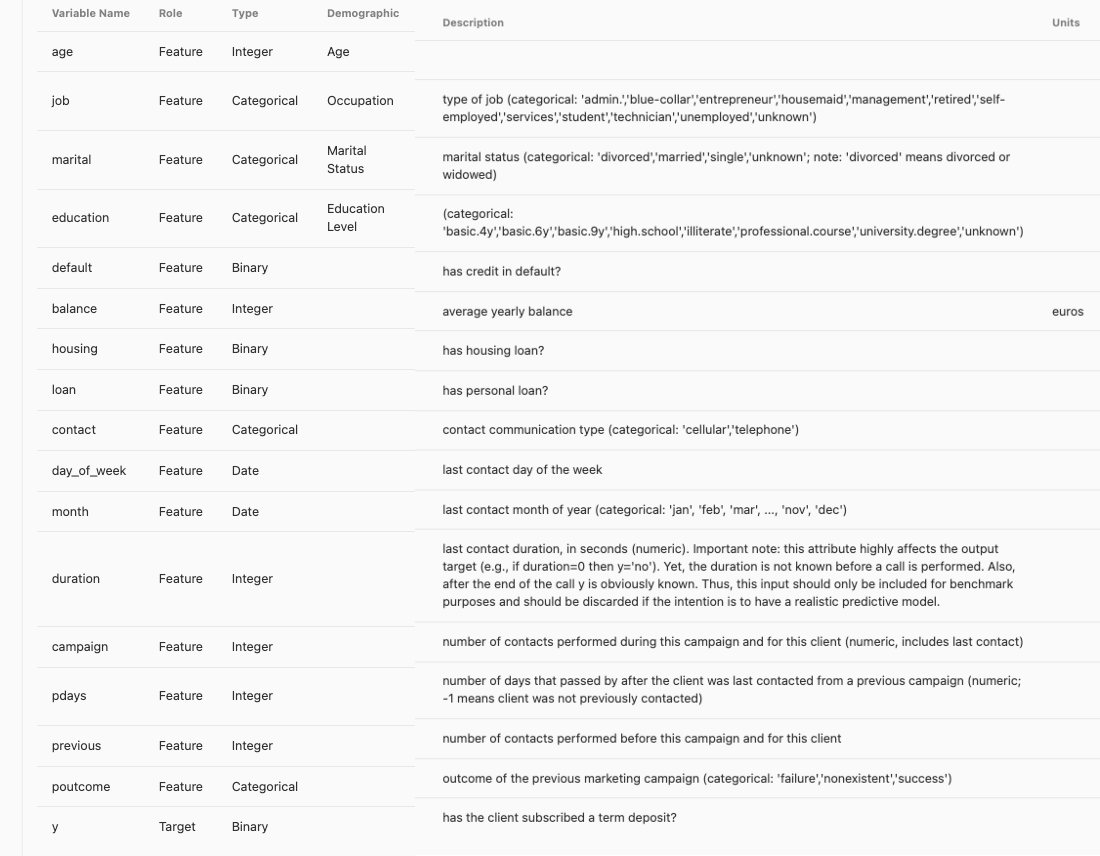

Data Loading
===

Bagian ini berisi proses data loading dan eksplorasi data sederhana. Cantumkan query SQL masing-masing data yang di-load jika dataset berasal dari Google BigQuery atau server SQL lainnya. Tampilkan juga datanya.

## Import Libraries

In [225]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import library
from scipy import stats
import numpy as np 

## Read file

In [221]:
# Import data from a CSV file named 'P0M1_Sam_dataset.csv' using ';' as the delimiter
df = pd.read_csv('P0M1_Sam_dataset.csv', sep=';')

# Display concise summary of the DataFrame
df.info()

# Show the first 5 rows of the DataFrame to get a quick look at the data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## **- Showing values of each columns**

Note: Inspect the unique values in each column

In [177]:
# Get all column names from the DataFrame and assign them to cat_cols
cat_cols = df.columns

# Loop through each column in the DataFrame
for col in cat_cols:
    print(f"column: {col}")
    display(df[col].unique())
    print("\n")

column: age


array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])



column: job


array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)



column: marital


array(['married', 'single', 'divorced'], dtype=object)



column: education


array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)



column: default


array(['no', 'yes'], dtype=object)



column: balance


array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], shape=(2353,))



column: housing


array(['no', 'yes'], dtype=object)



column: loan


array(['no', 'yes'], dtype=object)



column: contact


array(['cellular', 'unknown', 'telephone'], dtype=object)



column: day


array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24])



column: month


array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)



column: duration


array([  79,  220,  185,  199,  226,  141,  341,  151,   57,  313,  273,
        113,  328,  261,   89,  189,  239,  114,  250,  148,   96,  140,
        109,  125,  169,  182,  247,  119,  149,   74,  897,   81,   40,
        958,  354,  150,   97,  132,  765,   16,  609,  106,  365,  205,
         11,  105,   59,  425,  204,  181, 1018, 1740,   98,  441,  272,
        159,  295,  314,  579,  554,  323,  227,  134,  223,  155,  130,
        630,  164,  268,  380,  154,  221,   67,  367,   87,  701,  652,
         63,  398,  224,  406,   60,  521,  279,  203,  201,  372,  391,
        165,  231,  291,  233,  473,  736,  337,  553,  345,   65,    9,
        259,  371,  280,  243,  435,  258,    7,  317,   76,  170,  386,
         83,   69,  564,  588,  779,  281, 1877,   51,   32,  176,  161,
        187,   24,   85,  236,   54,   71,  489,   39,  455,   86,  190,
         45,  168,  194,  103,  333,  102,   92,  213,  289,   77,  324,
         84,   10,   35,   82,  676,   80,  549,  1



column: campaign


array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44])



column: pdays


array([ -1, 339, 330, 176, 147, 241, 152, 105, 342, 101,   5,  92,  56,
       170, 182, 297, 196, 460, 137, 367, 145, 169, 207, 266, 288, 168,
       345, 436,  90, 183, 146, 335, 347, 119,   7, 271, 181,  88, 141,
       126,  61, 373, 351, 242,  62,  91, 308, 250, 172, 265,  78,  28,
        79,   1, 188, 167,  89, 164, 462, 209, 321, 254,  94, 364,  96,
       356, 149, 363, 275, 325, 341, 260, 358,  87, 303,  98, 327, 337,
       322, 102,  99, 370,  84, 212,  63,  81, 191, 360, 332,  80,  85,
       247, 150, 175, 382, 261, 336,  58, 206, 112, 199, 133, 208, 253,
       135, 278, 140, 298, 273, 124, 281, 162, 323, 349, 117,   2, 256,
       333, 116, 268, 136, 198, 357, 259, 353, 174, 371, 205, 246,  69,
       315, 110, 461, 184, 270, 127, 187,  64, 130, 346, 100, 352, 808,
       113, 378, 292, 287, 107, 293, 139, 138, 193, 274,  97, 103, 359,
       185, 674, 211, 300, 334, 280, 479,  95, 262, 362, 225,   3, 366,
        60, 190, 368, 122, 343, 131, 365, 299, 115, 316, 180, 15



column: previous


array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25])



column: poutcome


array(['unknown', 'failure', 'other', 'success'], dtype=object)



column: y


array(['no', 'yes'], dtype=object)

## **- How many "no" are in default, housing, loan, and y columns**

In [178]:
# Define a list of specific columns to check for the value "no"
columns_to_check_no = ['default', 'housing', 'loan', 'y']

# Loop through each column name in the list
for col in columns_to_check_no:
    if col in df.columns:
        # Count occurrences of the value "no" in the column; return 0 if "no" isn't found
        no_count = df[col].value_counts().get('no', 0)
        print(f'Number of "no" in column {col}: {no_count}')
    else:
        print(f'Column {col} not found')

Number of "no" in column default: 4445
Number of "no" in column housing: 1962
Number of "no" in column loan: 3830
Number of "no" in column y: 4000


## **- How many "negative value" are in balance and pdays columns**

In [179]:
# Define a list of numerical columns to check for negative values
columns_to_check_negative = ['balance', 'pdays']

# Loop through each column name in the list
for col in columns_to_check_negative:
    if col in df.columns:
        n_count = (df[col] < 0).sum()
        print(f'Number of negative values in column {col}: {n_count}')
    else:
        print(f'Column {col} not found')

Number of negative values in column balance: 366
Number of negative values in column pdays: 3705


## **- How many "1" is in campaign column**

In [180]:
# Check if the 'campaign' column exists in the DataFrame
if 'campaign' in df.columns:
    # Count how many times the value 1 appears in the 'campaign' column
    one_count = df['campaign'].value_counts().get(1, 0)
    print(f'Number of "1" in column "campaign": {one_count}')
else:
    print(f'Column "campaign" not found')

Number of "1" in column "campaign": 1734


## **- How many "0" is in previous column**

In [181]:
# Check if the 'previous' column exists in the DataFrame
if 'previous' in df.columns:
    # Count how many times the value 0 appears in the 'previous' column
    no_count = df['previous'].value_counts().get(0, 0)
    print(f'Number of "0" in column "previous": {no_count}')
else:
    print(f'Column "previous" not found')

Number of "0" in column "previous": 3705


## **- How many "unknown" are in poutcome and contact columns**

In [182]:
# List of columns to check for the value 'unknown'
columns_to_check_unknown = ['poutcome', 'contact']

# Loop through each specified column
for col in columns_to_check_unknown:
    if col in df.columns:
        # Count how many times the value 'unknown' appears in the column
        unknown_count = df[col].value_counts().get('unknown', 0)
        print(f"Number of 'unknown' in column '{col}': {unknown_count}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

Number of 'unknown' in column 'poutcome': 3705
Number of 'unknown' in column 'contact': 1324


## **- Show both in poutcome and contact columns have "unknown" value**

In [183]:
# Filter the DataFrame to select rows where 'poutcome' or 'contact' columns have the value 'unknown'
unknown_rows = df[(df['poutcome'] == 'unknown') | (df['contact'] == 'unknown')]
show_unknown = len(unknown_rows)
print(f'Poutcome & contact columns have "unknown" value): {show_unknown}')

Poutcome & contact columns have "unknown" value): 3716


## **- Show in poutcome columns has "other" value**

In [184]:
# Filter the DataFrame to select rows where the 'poutcome' column has the value 'other'
other_rows = df[df['poutcome'] == 'other']
show_other = len(other_rows)
print(f'Poutcome column has "other" value: {show_other}')

Poutcome column has "other" value: 197


## **- Check if pdays column has 0 value**

In [185]:
# Check if the 'pdays' column exists in the DataFrame
if 'pdays' in df.columns:
    # Count how many times the value 0 appears in the 'pdays' column
    zero_duration_count = (df['pdays'] == 0).sum()
    print(f"Number of zero values in 'pdays' column: {zero_duration_count}")
else:
    print("Column 'pdays' not found in the DataFrame.")

Number of zero values in 'pdays' column: 0


## **- Check if pdays column has -1 value**

In [186]:
# Check if the 'pdays' column exists in the DataFrame
if 'pdays' in df.columns:
    # Count how many times the value -1 appears in the 'pdays' column
    minus_duration_count = (df['pdays'] == -1).sum()
    print(f"Number of minus values in 'pdays' column: {minus_duration_count}")
else:
    print("Column 'pdays' not found in the DataFrame.")

Number of minus values in 'pdays' column: 3705


## **- Insights**
- There are 4445 individuals who don't have a default on their bank account.
- There are 1962 individuals who don't have a housing loan.
- There are 3830 individuals who don't have a personal loan.
- There are 4000 individuals who hasn't subcribed a term deposit.
- There are 366 individuals who have a negative average yearly balance.
- There are 3705 individuals who weren't previously contacted.
- There are 1734 individuals who only one time contacted during the campaign.
- There are 3705 individuals who did not get contacted before the campaign.
- There are 3705 individuals who are the outcome is unknown from the previous campaign.
- There are 1324 individuals who are communication type is unknown.
- There are 3716'individuals who are both the outcome from the previous campaign and the communication type is unknown.
- There are 197 individuals who are the outcome is other from the previous campaign.
- There are 3705 individuals who are not previously contacted.
- Column day and month are seperated.
- There is no indication of what year is it.
- duration column is not clear enough. 

## **- Next Actions**
- Change 'duration' column into 'duration (in seconds)' for better understanding
- Combine 'day' and'month' columns into one column with 2012 as the year(this data is taken back in 2012) as 'last contact' column
- Chnage the data type of 'last contact' column into datetime
- Drop 'day' and 'month' columns 
- Extract data and save it into a new file as 'P0M1_Sam_dataset.csv

Data Cleaning
===

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan eksplorasi data lebih dalam. Proses data cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

## **- Change duration into duration(in seconds)**

In [ ]:
# Rename the column 'duration' to 'duration(in seconds)'
df = df.rename(columns={'duration': 'duration(in seconds)'})

## **- Combine column day and month into one column with 2012 as the year as column last contact**

In [188]:
df['last contact'] = '2012-' + df['month'].astype(str) + '-' + df['day'].astype(str)

## **- Change data type of last contact into datetime**

In [189]:
df['last contact'] = pd.to_datetime(df['last contact'], format='%Y-%b-%d')

## **- Drop day and month columns**

In [190]:
df = df.drop(columns=['day', 'month'])

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   4521 non-null   int64         
 1   job                   4521 non-null   object        
 2   marital               4521 non-null   object        
 3   education             4521 non-null   object        
 4   default               4521 non-null   object        
 5   balance               4521 non-null   int64         
 6   housing               4521 non-null   object        
 7   loan                  4521 non-null   object        
 8   contact               4521 non-null   object        
 9   duration(in seconds)  4521 non-null   int64         
 10  campaign              4521 non-null   int64         
 11  pdays                 4521 non-null   int64         
 12  previous              4521 non-null   int64         
 13  poutcome          

## **- Extract data and save it into a new file as 'P0M1_Sam_dataset.csv**

In [215]:
df.to_csv('cleaned_data.csv', index=False, date_format='%Y-%m-%d')

In [218]:
# Check cleaned_data.csv
ndf = pd.read_csv('cleaned_data.csv', parse_dates=['last contact'])

ndf.info()

ndf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   4521 non-null   int64         
 1   job                   4521 non-null   object        
 2   marital               4521 non-null   object        
 3   education             4521 non-null   object        
 4   default               4521 non-null   object        
 5   balance               4521 non-null   int64         
 6   housing               4521 non-null   object        
 7   loan                  4521 non-null   object        
 8   contact               4521 non-null   object        
 9   duration(in seconds)  4521 non-null   int64         
 10  campaign              4521 non-null   int64         
 11  pdays                 4521 non-null   int64         
 12  previous              4521 non-null   int64         
 13  poutcome          

,age,job,marital,education,default,balance,housing,loan,contact,duration(in seconds),campaign,pdays,previous,poutcome,y,last contact
0,30,unemployed,married,primary,no,1787,no,no,cellular,79,1,-1,0,unknown,no,2012-10-19
1,33,services,married,secondary,no,4789,yes,yes,cellular,220,1,339,4,failure,no,2012-05-11
2,35,management,single,tertiary,no,1350,yes,no,cellular,185,1,330,1,failure,no,2012-04-16
3,30,management,married,tertiary,no,1476,yes,yes,unknown,199,4,-1,0,unknown,no,2012-06-03
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,226,1,-1,0,unknown,no,2012-05-05


Exploration and Analysis
===

Bagian ini berisi proses analisis, penjelasan, perhitungan statistik deskriptif & inferensial, serta pembuatan visualisasi data. Untuk visualisasi data wajib memberikan insight pada setiap plot visualisasinya.

## --- Visualization ---

###  1. What is the approximate median age for individuals who have subscribed, and how does it compare to those who have not subscribed?

/var/folders/n4/kvlcyxhs1_94vyryvb4w99kw0000gn/T/ipykernel_37577/1199629576.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=df, palette='Set2')


Text(0, 0.5, 'Age')

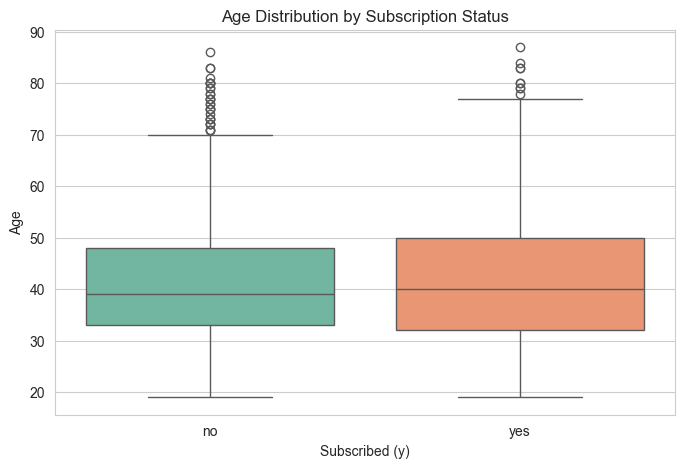

In [203]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

# Graph 1: Distribution of Age by Subscription (y)
sns.boxplot(x='y', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Subscribed (y)')
plt.ylabel('Age')

By looking the box plot above, it seems that there isn't a substantial difference in the median age between individuals who subscribe and those who do not. Both groups have a median age of around 40 years. The interquartile range (the middle 50% of ages) is also quite similar for both groups.

However, the "no" (not subscribed) group appears to have a larger number of older outliers, indicating that while their core age distribution is similar to subscribers, there's a more pronounced presence of much older individuals who haven't or chosen not to subscribe. On the other hand, the "yes" (subscribed) group, while also having some older outliers, seems to have a slightly more concentrated age distribution within its main body, particularly at the younger end of the spectrum (the lower whisker for "yes" starts slightly higher than for "no").

### 2. Which job type has the highest absolute number of non-subscribers?

<Figure size 800x500 with 0 Axes>

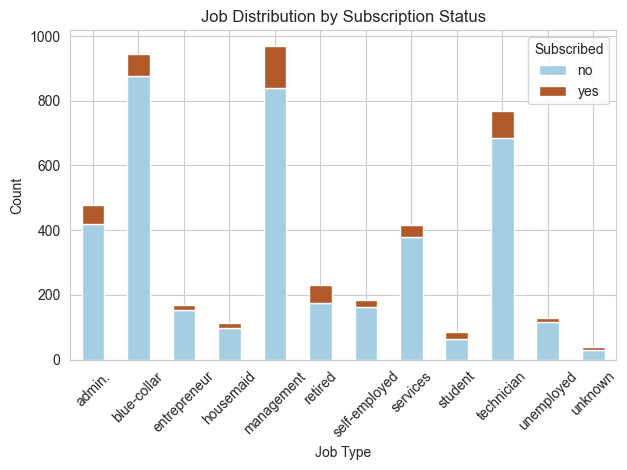

In [209]:
# Graph 2: Job Distribution with Subscription Status

plt.figure(figsize=(8,5))
job_counts = df.groupby(['job', 'y']).size().unstack()
job_counts.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Job Distribution by Subscription Status')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')

plt.tight_layout()
plt.show()

While "blue-collar" and "management" represent the largest pools of individuals, and thus contribute the highest absolute numbers of both subscribers and non-subscribers, there isn't a single job type that stands out as having a significantly high subscription rate. In conclusion from this graph is that the overall subscription rate is low across all job types. The vast majority of individuals in every depicted profession have not subscribed.

### 3. What does it suggest about the relationship between balance and subscription status?

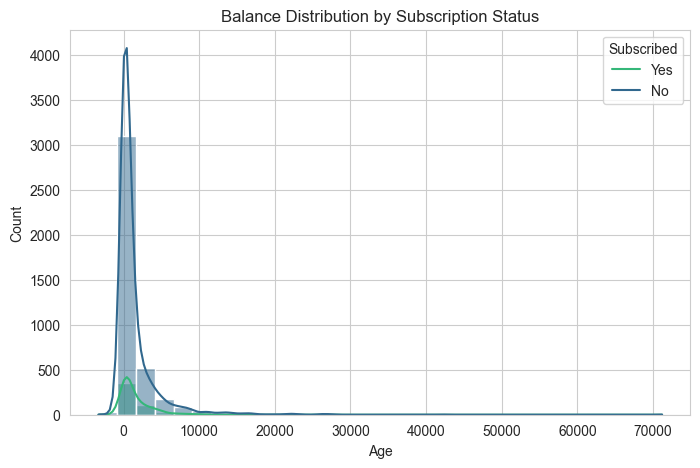

In [224]:
# Graph 3: Balance Distribution by Subscription Status (Histogram)

plt.figure(figsize=(8, 5))

sns.histplot(data=df, x='balance', hue='y', kde=True, 
            palette='viridis', bins=30, alpha=0.5)
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Subscribed', labels=['Yes', 'No'])

Based on the histogram above, it seems that both groups are predominantly characterized by low balances, individuals with higher balances are significantly more likely to be subscribers. The "Yes" distribution clearly demonstrates a presence across a much broader range of higher balances, even if those are fewer in number compared to the low-balance segment. In conclusion, subscribers tend to have, on average, higher balances and a wider distribution of balances compared to non-subscribers.



### 4. Which marital status group has the highest proportional subscription rate, and which has the lowest proportional subscription rate?

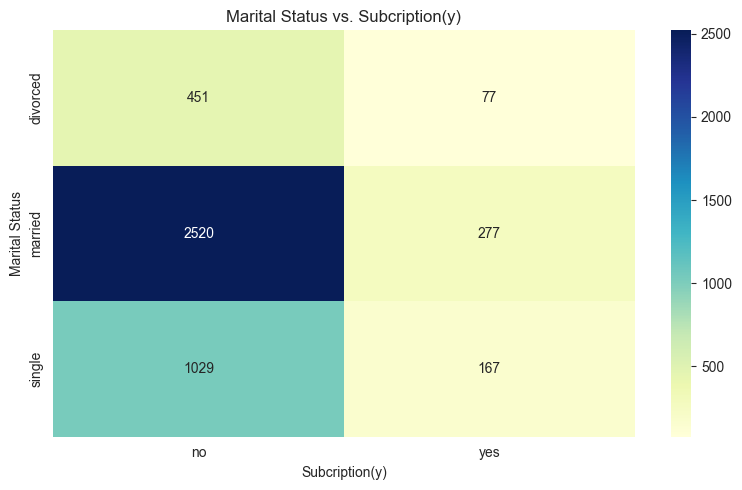

In [201]:
# Graph 4: Marital Status and Subcription(y) Heatmap

plt.figure(figsize=(8, 5))

cross_tab = pd.crosstab(df['marital'], df['y'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Marital Status vs. Subcription(y)')
plt.xlabel('Subcription(y)')
plt.ylabel('Marital Status')

plt.tight_layout()
plt.show()

The married population represents the largest customer segment in terms of both subscribers and non-subscribers, and yet they exhibit the lowest subscription rate proportionally compared to divorced and single individuals.

In conclusion, divorced individuals show the highest propensity to subscribe, followed closely by single individuals, even though these groups are smaller in overall size. It seems the target market would be the marrieds.

## --- Descriptive Statistics Question ---

### 5. What is the average age of the clients in the dataset?

In [212]:
# Calculate the average age
average_age = df['age'].mean()
print(f"Descriptive Statistics Question:")
print(f"The average age of the clients in the dataset is: {average_age:.2f} years")

Descriptive Statistics Question:
The average age of the clients in the dataset is: 41.17 years


<b>- Note: More Descriptive Statistics are in Question 1: Boxplot</b>

<b> The average age of the clients in the dataset is: 41.17 years</b>

## --- Inferential Statistics Question ---

### 6. Is there a statistically significant difference in the average balance between clients who subscribed to a term deposit and those who did not?

<b>Note: </b>

- I am using Independent Samples t-test cause I'm comparing the means of a continuous variable across two independent groups. Therefore, the Independent Samples t-test is the most appropriate statistical method.

- Those who subscribed (indicated by y = 'yes') and those who did not (indicated by y = 'no')

<b>Hypothesis:</b>

(H0) = There is no statistically significant difference in the true average balance between clients who subscribed to a term deposit and those who did not.

(H1) = There is a statistically significant difference in the true average balance between clients who subscribed to a term deposit and those who did not.

In [213]:
# Separate the 'balance' data into two groups based on 'y'
balance_subscribed = df[df['y'] == 'yes']['balance']
balance_not_subscribed = df[df['y'] == 'no']['balance']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(balance_subscribed, balance_not_subscribed, equal_var=False) # Assuming unequal variances

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"Since the p-value ({p_value:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print(f"There is a statistically significant difference in the average balance between clients who subscribed to a term deposit and those who did not.")
else:
    print(f"Since the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant difference in the average balance between clients who subscribed to a term deposit and those who did not.")

T-statistic: 1.43
P-value: 0.152
Since the p-value (0.152) is greater than the significance level (0.05), we fail to reject the null hypothesis.
There is no statistically significant difference in the average balance between clients who subscribed to a term deposit and those who did not.


Since the p-value (0.152) is greater than the significance level (0.05), we fail to reject the null hypothesis. This means there is no statistically significant difference in the average balance between clients who subscribed to a term deposit and those who did not.

Link to Dashboard Tableau
===

https://public.tableau.com/app/profile/sam.wayne3539/viz/Book1_17502563939920/Main

Conclusion
===
Age and Balance are not statistically significant predictors of subscription since the T-statistic and P-value for balance indicate no statistically significant difference in average balance between subscribers and non-subscribers. On the other hand, "Married" individuals have the highest absolute number of both subscriptions and non-subscriptions. While the overall "no" subscriptions are higher, the proportion of "yes" subscriptions relative to "no" subscriptions within the "single" and "divorced" categories might offer more targeted opportunities. While "Management," "technician," and "blue-collar" jobs have the highest number of non-subscribers, but also a considerable number of subscribers. "Admin." and "retired" also show notable subscription numbers. This categorical data suggests that certain job types may be more receptive than others.

In conclusion, while age and balance don't appear to be strong individual predictors, marital status and job type offer promising avenues for more focused direct marketing efforts.

Recommendation
===

To increase the subscription rate for term deposits by 3% within one month, the Portuguese banking institution should prioritize targeted campaigns based on marital status and job type:

Focus on "Single" and "Divorced" Individuals (Marital Status): While "married" individuals represent the largest group overall, analyze the conversion rate within each marital status. If the conversion rate for "single" or "divorced" individuals is proportionally higher, even if the absolute numbers are lower, these segments might be more receptive to tailored messaging.

Segment by "Management," "Technician," "Blue-collar," "Admin." and "Retired" (Job Type): These job types account for a significant portion of both subscribers and non-subscribers. To tackle this problem, try to develop specific messaging that resonates with the financial goals and situations typically associated with these professions. For instance, "retired" individuals might be interested in stable income from term deposits, while "management" might be looking for wealth preservation.